# Generation of a occupancy grid map of a generated world

The generation of an occupancy grid map can be used as a ground truth map input for a navigation algorithm.

This example randomly places cuboids and cylinders in an empty world and then generates two types of ground maps.

In one, all objects (apart from the ground plane) are included, and on the second, only the static objects are included.

In [1]:
import warnings

warnings.filterwarnings("ignore")

from pcg_gazebo.generators import WorldGenerator
from pcg_gazebo.visualization import plot_workspace, plot_occupancy_grid
from pcg_gazebo.generators.creators import box_factory
from pcg_gazebo.utils import generate_random_string

world_gen = WorldGenerator()

line 93.
line 104.
line 105.
line 109.
line 111.
line 109.
line 111.
line 106.
line 107.
line 109.
line 111.
line 109.
line 111.
line 108.
line 94.
line 101.
line 102.
line 104.
line 107.
line 109.
line 111.
line 109.
line 111.
line 108.
line 103.
line 95.
line 96.
line 88.
line 89.
default
line 90.
line 91.
line 92.


First, the assets manager must be populated. The random pose engine will use it to pull all the models to populate the world.

The following command adds a dynamic box generator to the list of assets. Dynamic boxes have a mass and moments of inertia computed from the `mass` input and the dimensions of the cuboids generated.

By giving an inline function with the command to compute randomized inputs for the box's `size` and `mass`, each new instance of the `box` model will have it's parameter computed at creation.

In [2]:
world_gen.add_asset(
    tag='dyn_box',
    description=dict(
        type='box',
        args=dict(
            size="5 * __import__('pcg_gazebo').random.rand(3)",
            name='cuboid',
            mass="max(0.1, __import__('pcg_gazebo').random.rand())",
            color='xkcd'
        )
    )
)

# Check if models where included correctly
print('Asset is available for world generation=', 'dyn_box' in world_gen.assets.tags)

line 111.
line 109.
line 111.
Asset is available for world generation= True


Creating the static cylinders uses a similar input for the assets manager. 
By omitting the `mass`, the generated models will be set as `static`.

In [3]:
world_gen.add_asset(
    tag='static_cylinder',
    description=dict(
        type='cylinder',
        args=dict(
            length="2 * __import__('pcg_gazebo').random.rand()",
            radius="2 * __import__('pcg_gazebo').random.rand()",
            name='cylinder',
            color='xkcd'
        )
    )
)

# Check if models where included correctly
print('Asset is available for world generation=', 'static_cylinder' in world_gen.assets.tags)

line 111.
line 109.
line 111.
Asset is available for world generation= True


Add a constraint to ensure all boxes are placed on top of ground plane

In [4]:
world_gen.add_constraint(
    name='tangent_to_ground_plane',
    type='tangent',
    frame='world',
    reference=dict(
        type='plane',
        args=dict(
            origin=[0, 0, 0],
            normal=[0, 0, 1]
        )
    )
)

print('List of constraints=', list(world_gen.constraints.tags))

List of constraints= ['tangent_to_ground_plane']


Add 2D workspace constraint defining where the boxes should be spawned in the world

List of constraints= ['my_workspace', 'tangent_to_ground_plane']


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f109533c8>)

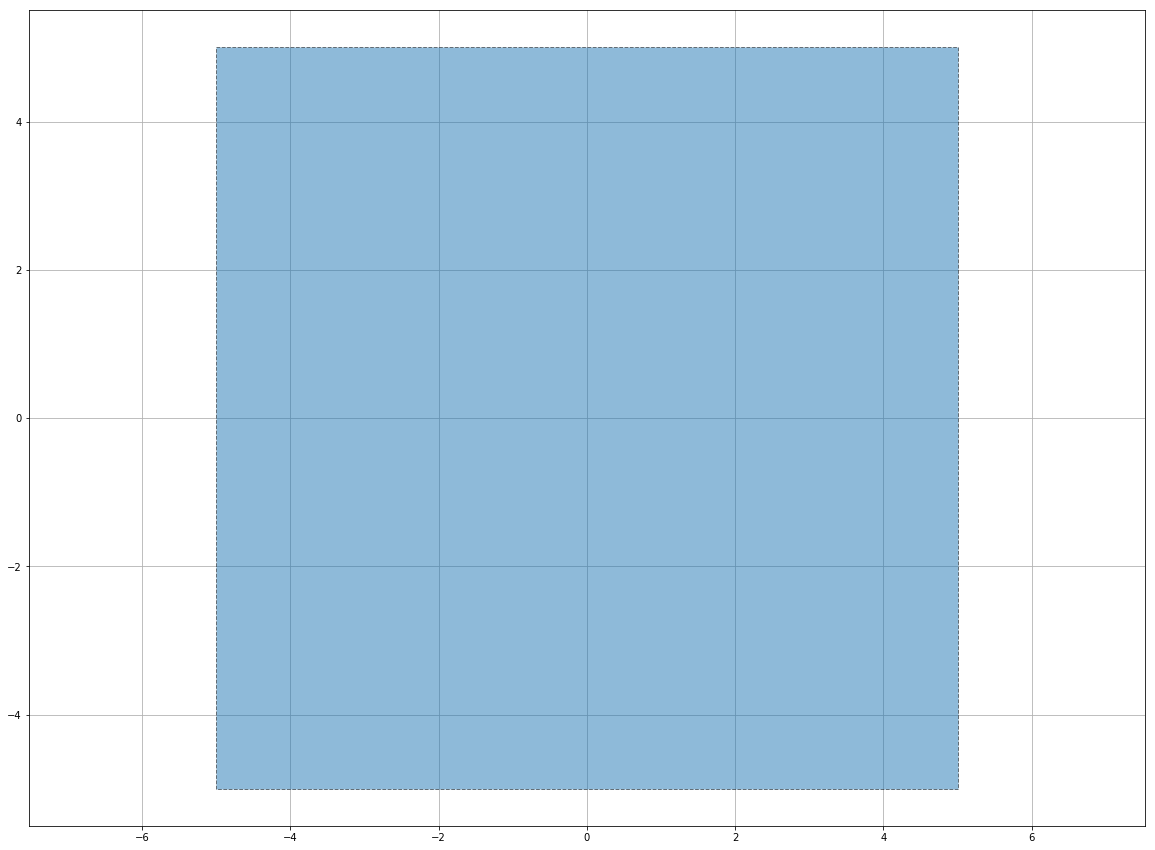

In [5]:
world_gen.add_constraint(
    name='my_workspace',
    type='workspace',
    frame='world',
    geometry_type='area',
    points=[
        [-5, -5, 0],
        [-5, 5, 0],
        [5, 5, 0],
        [5, -5, 0],
    ]
)

print('List of constraints=', list(world_gen.constraints.tags))

plot_workspace(workspace=world_gen.constraints.get('my_workspace'))

Add ground plane to the world in a fixed position

In [6]:
floor_model = box_factory(
    size=[
        [20, 20, 0.01]
    ],
    mass=1,
    use_permutation=True,
    name='box_floor'
)[0]
floor_model.name = 'box_floor'

world_gen.add_asset(tag='box_floor', description=floor_model)

world_gen.add_engine(
    engine_name='fixed_pose',
    tag='gp_engine',
    models=['box_floor'],
    poses=[[0, 0, -0.02, 0, 0, 0]])
world_gen.set_model_as_ground_plane('box_floor')

line 111.


True

Add a random pose engine to place the boxes in the world

In [7]:
NUM_BOXES = 1
NUM_CYLINDER = 1

placement_policy = dict(
    models=['dyn_box', 'static_cylinder'],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace='my_workspace'
        ),
        dict(
            dofs=['yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag='box_placement2',
    engine_name='random_pose',
    models=['dyn_box', 'static_cylinder'],
    max_num=dict(
        dyn_box=3,
        static_cylinder=3),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model='dyn_box',
            constraint='tangent_to_ground_plane'),
        dict(
            model='static_cylinder',
            constraint='tangent_to_ground_plane')
    ]
)

True

Run the engines to generate the world

In [8]:
world_gen.run_engines()

line 1.
line 2.
line 3.
line 4.
line 5.
line 6.
line 7.
box_placement2
line 8.
<class 'pcg_gazebo.generators.engines.random_pose_engine.RandomPoseEngine'>
line 9.
gp_engine
line 8.
<class 'pcg_gazebo.generators.engines.fixed_pose_engine.FixedPoseEngine'>
line 9.
line 10.
line 25.
line 27.
line 28.
line 37.
line 43.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 44.
line 49.
line 81.
line 82.
<model name="box_floor">
  <allow_auto_disable>0</allow_auto_disable>
  <link name="link">
    <gravity>1</gravity>
    <self_collide>0</self_collide>
    <kinematic>0</kinematic>
    <pose frame="">0 0 0 0 -0 0</pose>
    <collision name="collision">
      <geometry>
        <box>
          <size>20 20 0.01</size>
        </box>
      </geometry>
      <pose frame="">0 0 0 0 -0 0</pose>
      <max_contacts>20</max_contacts>
    </collision>
    <inertial>
      <inertia>
        <ixx>33.33334166666666</ixx>
        <iyz>0.0</iyz>
  

True

In [9]:
print(world_gen.world.models.keys())

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
dict_keys(['dyn_box_1', 'static_cylinder_1', 'box_floor', 'static_cylinder', 'stati

In [10]:
world_gen.world.create_scene().show()

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
lin

Next the grid map can be generated. It is important to check if the dynamic models should be included in the plot. 
That can be done using the `static_models_only` input.
The example below shows a grid map with both dynamic and static models. 

If is important to also include a list of the models that are flagged as part of the ground plane (e.g. floors, walls) in the `ground_plane_models`, since they are computed both for occupancy spots and the size of the free space.

To remove the ground plane from the map, the `with_ground_plane` flag input must be set to `False`.

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 68.
line 68.
line 68.
line 68.
line 68.
line 68.
line 69.
line 69.
line 69.
li

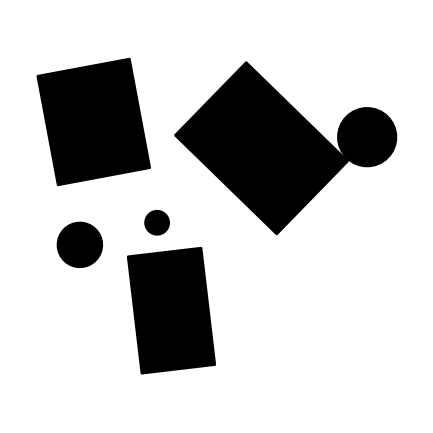

In [9]:
import matplotlib.pyplot as pyplot
fig = plot_occupancy_grid(world_gen.world.models, with_ground_plane=False, static_models_only=False, ground_plane_models=['box_floor'])
pyplot.show()

The example below shows a grid map with only static models. 

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 68.
line 68.
line 68.
line 69.
line 69.
line 69.
line 70.
line 70.
line 70.
li

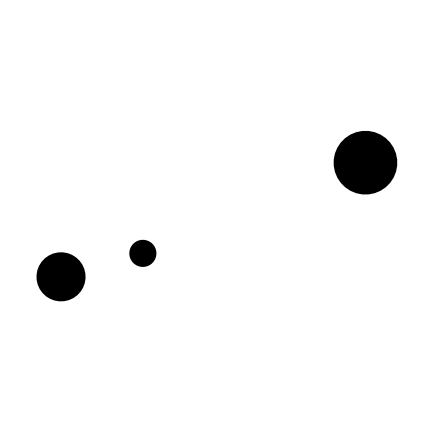

In [10]:
fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=False,
    static_models_only=True,
    ground_plane_models=['box_floor'])
pyplot.show()

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 81.
li

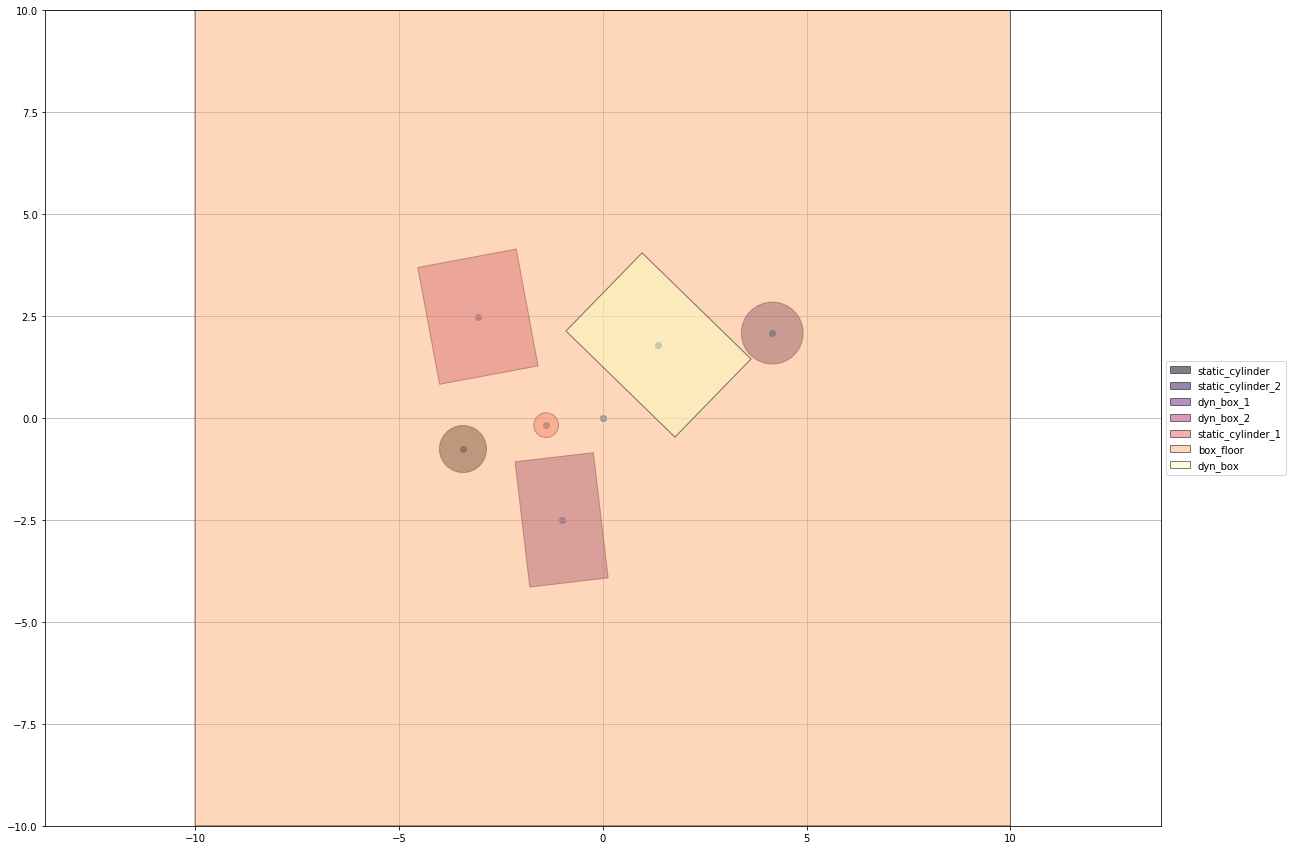

In [11]:
fig = world_gen.world.plot_footprints(engine='matplotlib')

## Generating a single room scenario

### Generating walls from the triangulation of random points

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f101dd4a8>)

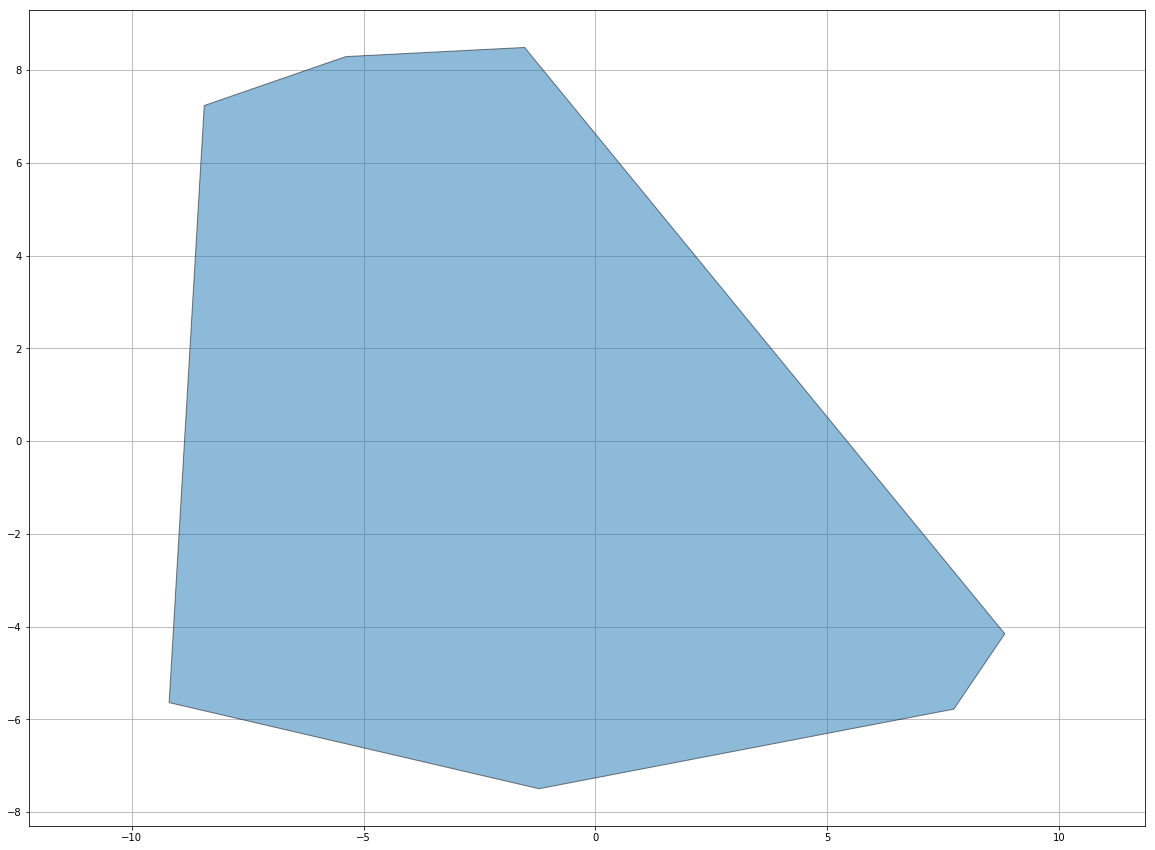

In [12]:
from pcg_gazebo.generators.creators import extrude
from pcg_gazebo.generators.shapes import random_points_to_triangulation
from pcg_gazebo.visualization import plot_shapely_geometry, plot_mesh
from pcg_gazebo.simulation import SimulationModel

n_points = 10

# Generate the polygon from where the walls will be extruded
wall_polygon = random_points_to_triangulation(n_points)

plot_shapely_geometry(wall_polygon)

Extrude the boundaries of the polygon to create walls.

In [13]:
wall_thickness = 0.15
wall_height = 2

walls_model = extrude(
    polygon=wall_polygon,
    thickness=wall_thickness,
    height=wall_height,
    pose=[0, 0, wall_height / 2., 0, 0, 0],
    extrude_boundaries=True,
    color='xkcd')
walls_model.name = 'walls'

Create a new world generator

In [14]:
# Reset world generator
world_gen.init()
world_gen.engines.reset()

# Add walls and ground plane to the world
world_gen.world.add_model(
    tag=walls_model.name,
    model=walls_model)
world_gen.world.add_model(
    tag='ground_plane',
    model=SimulationModel.from_gazebo_model('ground_plane'))

line 89.
default
line 90.
line 91.
line 92.
line 57.
default
line 59.
default
line 58.
line 60.
line 62.
walls
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 63.
line 64.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 58.
line 60.
line 62.
ground_plane
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 63.
line 64.


'ground_plane'

Retrieve the free space within the walls to place objects

In [15]:
free_space_polygon = world_gen.world.get_free_space_polygon(
    ground_plane_models=[walls_model.name],
    ignore_models=['ground_plane'])

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.

Set the free space as the workspace were the objects will be placed

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f1033c6d8>)

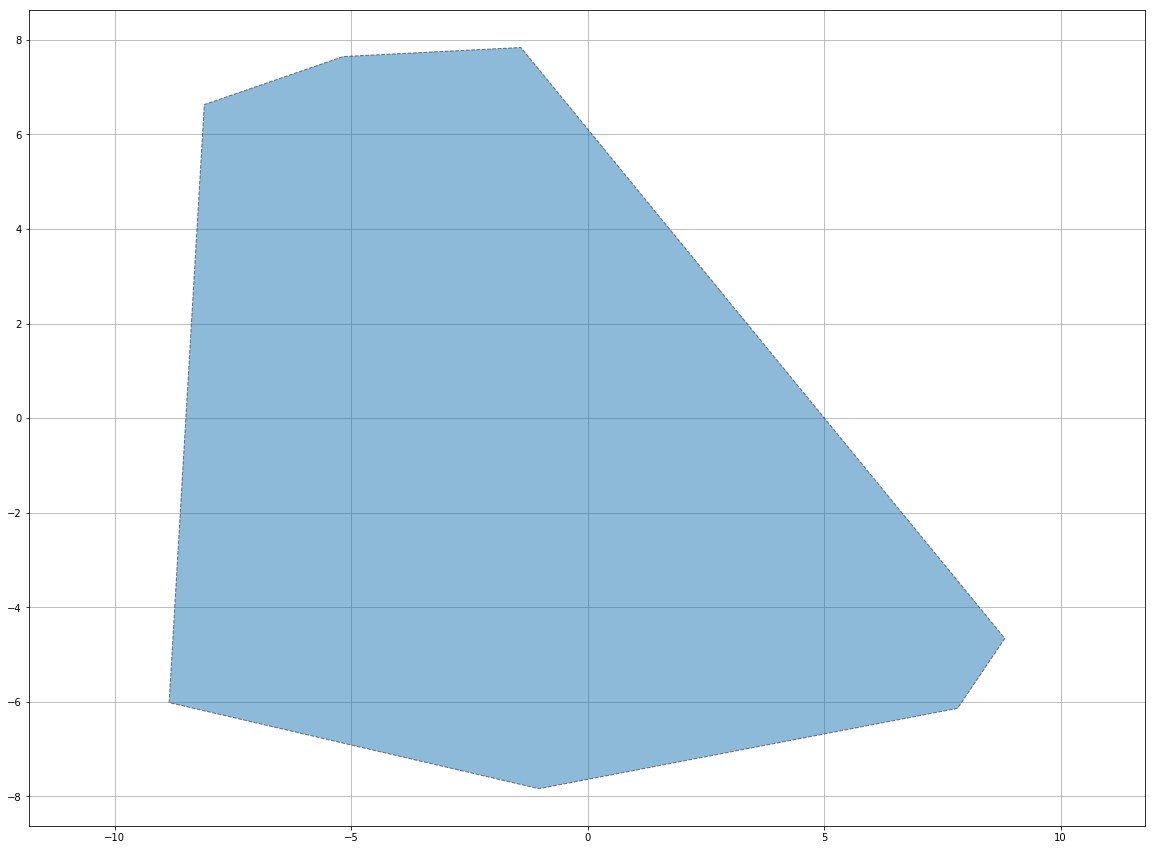

In [16]:
# Add the workspace constraint to the generator
world_gen.add_constraint(
    name='room_workspace',
    type='workspace',
    frame='world',
    geometry_type='polygon',
    polygon=free_space_polygon
)

plot_workspace(world_gen.constraints.get('room_workspace'))

In [17]:
NUM_BOXES = 4
NUM_CYLINDER = 4

placement_policy = dict(
    models=['dyn_box', 'static_cylinder'],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace='room_workspace'
        ),
        dict(
            dofs=['yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag=generate_random_string(5),
    engine_name='random_pose',
    models=['dyn_box', 'static_cylinder'],
    max_num=dict(
        dyn_box=NUM_BOXES,
        static_cylinder=NUM_CYLINDER),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model='dyn_box',
            constraint='tangent_to_ground_plane'),
        dict(
            model='static_cylinder',
            constraint='tangent_to_ground_plane')
    ]
)

True

In [18]:
world_gen.run_engines(attach_models=True)

line 1.
line 2.
line 3.
line 4.
line 5.
line 6.
line 7.
bLYqs
line 8.
<class 'pcg_gazebo.generators.engines.random_pose_engine.RandomPoseEngine'>
line 9.
line 14.
line 15.
line 16.
line 17.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 18.
line 18.
line 19.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
li

True

In [21]:
world_gen.world.models.keys()

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
lin

dict_keys(['dyn_box_1', 'dyn_box', 'static_cylinder_3', 'dyn_box_3', 'static_cylinder', 'walls', 'static_cylinder_1', 'dyn_box_2', 'static_cylinder_2', 'ground_plane'])

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
li

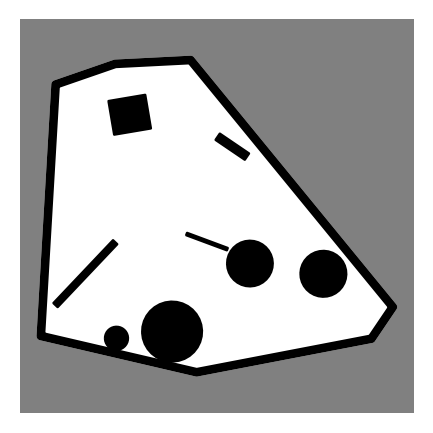

In [19]:
fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=True,
    static_models_only=False,
    exclude_contains=['ground_plane'],
    ground_plane_models=[walls_model.name])
pyplot.show()

### Generating walls from a random rectangle

In [20]:
from pcg_gazebo.generators.shapes import random_rectangle

wall_polygon = random_rectangle(
    delta_x_min=10, delta_x_max=15, delta_y_min=10, delta_y_max=15)

walls_model = extrude(
    polygon=wall_polygon,
    thickness=wall_thickness,
    height=wall_height,
    pose=[0, 0, wall_height / 2., 0, 0, 0],
    extrude_boundaries=True,
    color='xkcd')
walls_model.name = 'walls'

In [21]:
# Reset world generator
world_gen.init()
world_gen.engines.reset()

# Add walls and ground plane to the world
world_gen.world.add_model(
    tag=walls_model.name,
    model=walls_model)
world_gen.world.add_model(
    tag='ground_plane',
    model=SimulationModel.from_gazebo_model('ground_plane'))

line 89.
default
line 90.
line 91.
line 92.
line 57.
default
line 59.
default
line 58.
line 60.
line 62.
walls
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 63.
line 64.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 58.
line 60.
line 62.
ground_plane
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 63.
line 64.


'ground_plane'

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f0ff6aac8>)

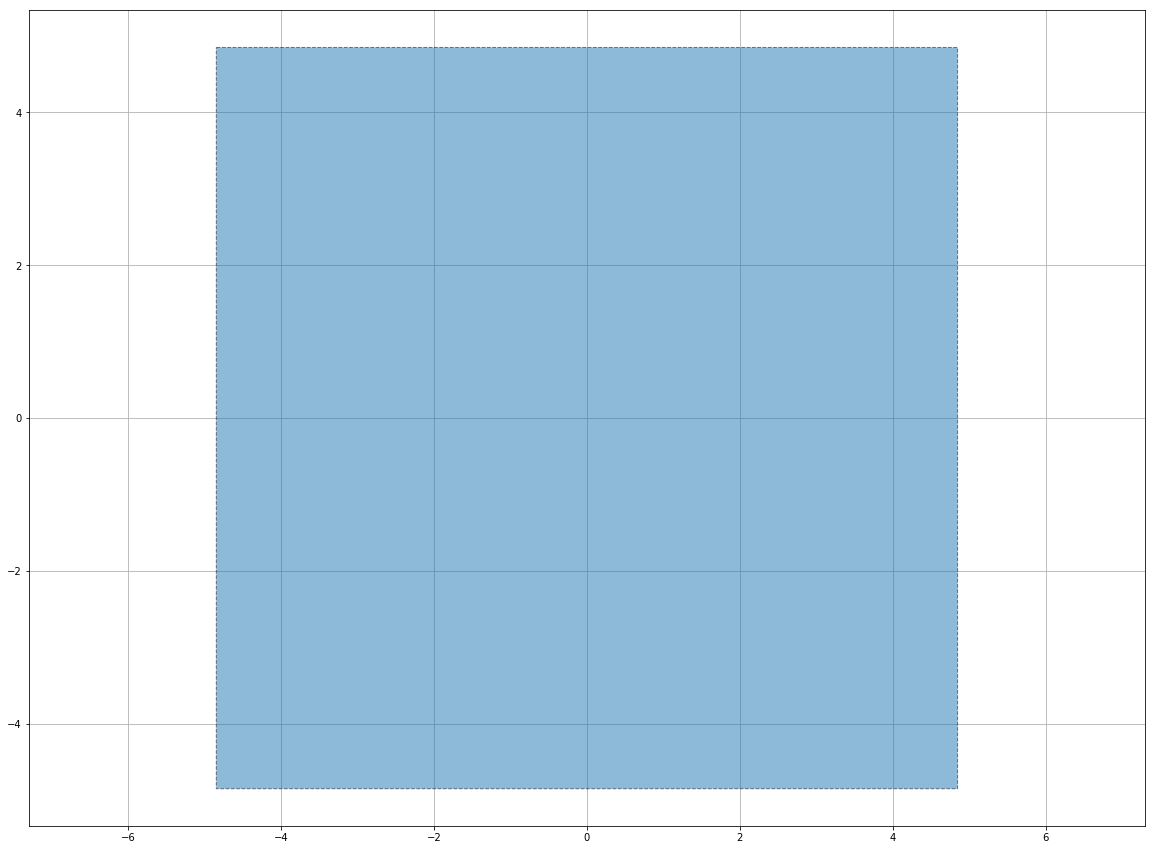

In [22]:
free_space_polygon = world_gen.world.get_free_space_polygon(
    ground_plane_models=[walls_model.name],
    ignore_models=['ground_plane'])

# Add the workspace constraint to the generator
world_gen.add_constraint(
    name='room_workspace',
    type='workspace',
    frame='world',
    geometry_type='polygon',
    polygon=free_space_polygon
)

plot_workspace(world_gen.constraints.get('room_workspace'))

In [23]:
NUM_BOXES = 4
NUM_CYLINDER = 4

placement_policy = dict(
    models=['dyn_box', 'static_cylinder'],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace='room_workspace'
        ),
        dict(
            dofs=['yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag=generate_random_string(5),
    engine_name='random_pose',
    models=['dyn_box', 'static_cylinder'],
    max_num=dict(
        dyn_box=NUM_BOXES,
        static_cylinder=NUM_CYLINDER),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model='dyn_box',
            constraint='tangent_to_ground_plane'),
        dict(
            model='static_cylinder',
            constraint='tangent_to_ground_plane')
    ]
)

True

In [24]:
world_gen.run_engines(attach_models=True)

line 1.
line 2.
line 3.
line 4.
line 5.
line 6.
line 7.
HNkBi
line 8.
<class 'pcg_gazebo.generators.engines.random_pose_engine.RandomPoseEngine'>
line 9.
line 14.
line 15.
line 16.
line 17.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 18.
line 18.
line 19.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
li

True

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
li

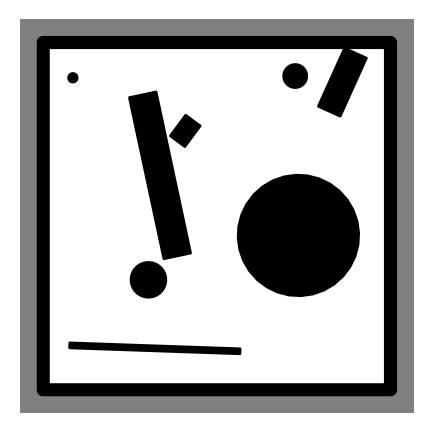

In [25]:
fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=True,
    static_models_only=False,
    exclude_contains=['ground_plane'],
    ground_plane_models=[walls_model.name])
pyplot.show()

### Generating walls from merging random rectangles

In [26]:
from pcg_gazebo.generators.shapes import random_rectangles

wall_polygon = random_rectangles(
    n_rect=5, delta_x_min=10, delta_x_max=15, delta_y_min=10, delta_y_max=15)

walls_model = extrude(
    polygon=wall_polygon,
    thickness=wall_thickness,
    height=wall_height,
    pose=[0, 0, wall_height / 2., 0, 0, 0],
    extrude_boundaries=True,
    color='xkcd')
walls_model.name = 'walls'

In [27]:
# Reset world generator
world_gen.init()
world_gen.engines.reset()

# Add walls and ground plane to the world
world_gen.world.add_model(
    tag=walls_model.name,
    model=walls_model)
world_gen.world.add_model(
    tag='ground_plane',
    model=SimulationModel.from_gazebo_model('ground_plane'))

line 89.
default
line 90.
line 91.
line 92.
line 57.
default
line 59.
default
line 58.
line 60.
line 62.
walls
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 63.
line 64.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 58.
line 60.
line 62.
ground_plane
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 63.
line 64.


'ground_plane'

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f102be208>)

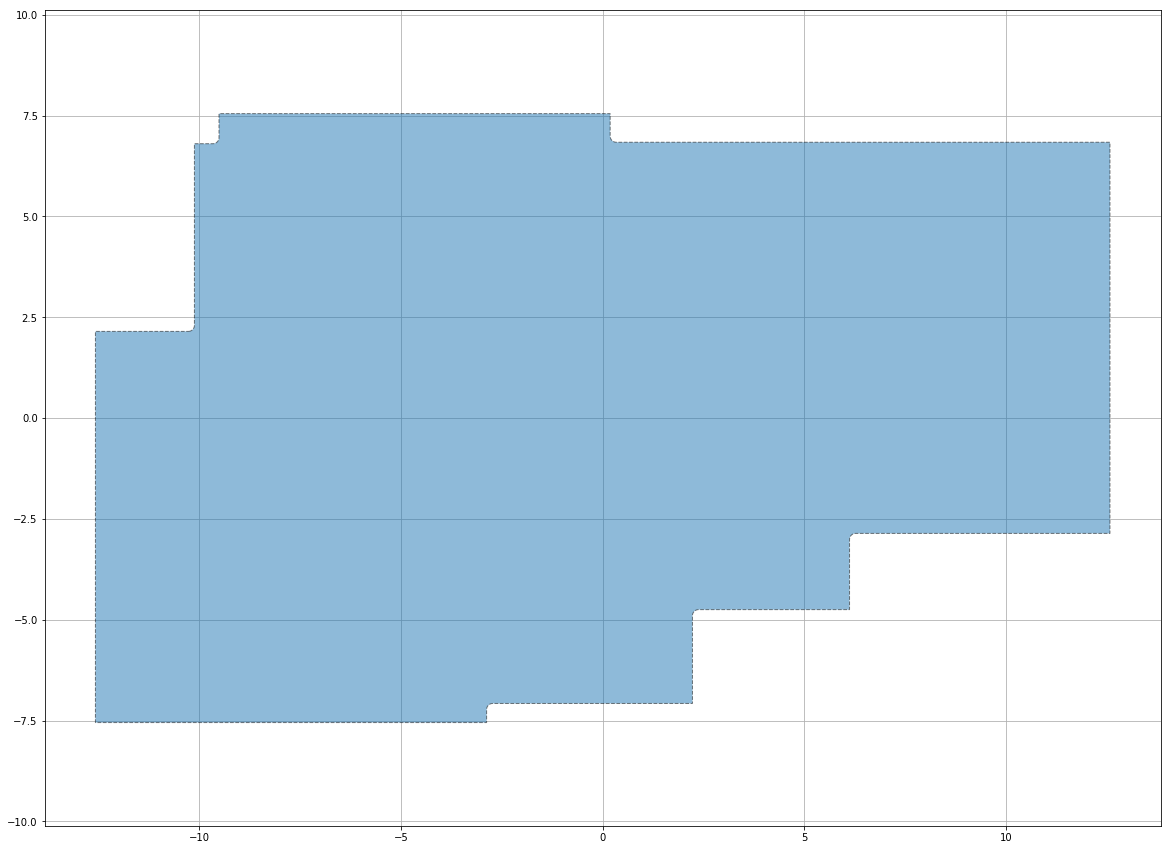

In [28]:
free_space_polygon = world_gen.world.get_free_space_polygon(
    ground_plane_models=[walls_model.name],
    ignore_models=['ground_plane'])

# Add the workspace constraint to the generator
world_gen.add_constraint(
    name='room_workspace',
    type='workspace',
    frame='world',
    geometry_type='polygon',
    polygon=free_space_polygon
)

plot_workspace(world_gen.constraints.get('room_workspace'))

In [30]:
NUM_BOXES = 4
NUM_CYLINDER = 4

placement_policy = dict(
    models=['dyn_box', 'static_cylinder'],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace='room_workspace'
        ),
        dict(
            dofs=['yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag=generate_random_string(5),
    engine_name='random_pose',
    models=['dyn_box', 'static_cylinder'],
    max_num=dict(
        dyn_box=NUM_BOXES,
        static_cylinder=NUM_CYLINDER),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model='dyn_box',
            constraint='tangent_to_ground_plane'),
        dict(
            model='static_cylinder',
            constraint='tangent_to_ground_plane')
    ]
)

True

In [31]:
world_gen.run_engines(attach_models=True)

line 1.
line 2.
line 3.
line 4.
line 5.
line 6.
line 7.
zHzon
line 8.
<class 'pcg_gazebo.generators.engines.random_pose_engine.RandomPoseEngine'>
line 9.
xwfxv
line 8.
<class 'pcg_gazebo.generators.engines.random_pose_engine.RandomPoseEngine'>
line 9.
line 14.
line 15.
line 16.
line 17.
line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 56.
line 18.
line 18.
line 19.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
lin

True

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
li

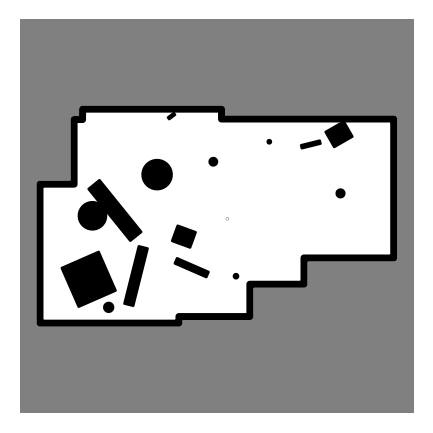

In [32]:
fig = plot_occupancy_grid(world_gen.world.models, with_ground_plane=True, static_models_only=False, exclude_contains=['ground_plane'], ground_plane_models=[walls_model.name])
pyplot.show()